### PHYS 270 Assignment 7: Interpolation

Student Name: Rakhat Zhussupkhanov

#**ABSTRACT**

In this assignment, a set of 9 points from -1 to 1 with a step of 0.25 and a function $f(x) = e^{-15x^2}$ were given to determine the best interpolation technique among linear (with and without logarithmization) and cubic (with and without logarithmization). The results revealed that cubic splines with logarithms are the most accurate as they had the least root mean square error.

# **INTRODUCTION**

Interpolation is an estimation method where a new set of data points are generated within an interval some points of which are known. There are several types of interpolation, but in this assignment we considered spline, namely linear, cubic, both with and without logarithmization. The best one was determined using root mean square error.

# **METHODS**

``SciPy`` library in Python contains function for interpolation: ``interp1d`` for linear and ``CubicSpline`` for cubic. They are very convenient, so we used them.

First, we imported the necessary libraries.

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [ ]:
def g(x):
  return np.exp(-15 * (x**2))

In [ ]:
x = np.arange(-1, 1.25, 0.25)
x

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [ ]:
f = interp1d(x, g(x))

This is where we use ``interpid``.

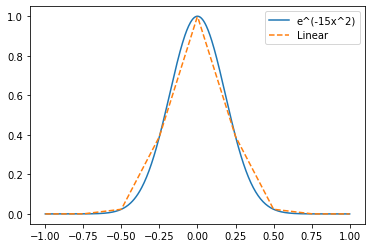

In [ ]:
xnew = np.linspace(-1, 1, num=500)
plt.plot(xnew, g(xnew), '-', xnew, f(xnew), '--')
plt.legend(['e^(-15x^2)', 'Linear'], loc='best')
plt.show()

Now, we estimate cubic spline.

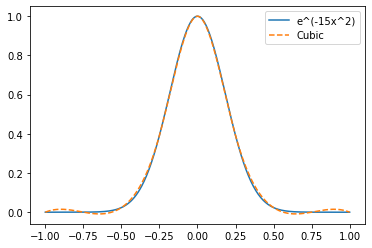

In [ ]:
f2 = CubicSpline(x, g(x))
plt.plot(xnew, g(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['e^(-15x^2)', 'Cubic'], loc='best')
plt.show()

To estimate linear spline with logarithmization, we logarithmize the function, linearly interpolate it and use its exponent.

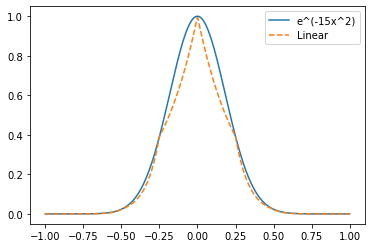

In [ ]:
f3 = interp1d(x, np.log(g(x)))
plt.plot(xnew, g(xnew), '-', xnew, np.exp(f3(xnew)), '--')
plt.legend(['e^(-15x^2)', 'Linear Logarithmic'], loc='best')
plt.show()

To estimate cubic spline with logarithmization, we logarithmize the function, cubically interpolate it and use its exponent.

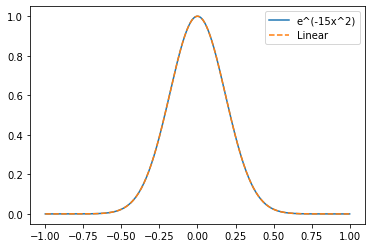

In [ ]:
f4 = CubicSpline(x, np.log(g(x)))
plt.plot(xnew, g(xnew), '-', xnew, np.exp(f4(xnew)), '--')
plt.legend(['e^(-15x^2)', 'Cubic Logarithmic'], loc='best')
plt.show()

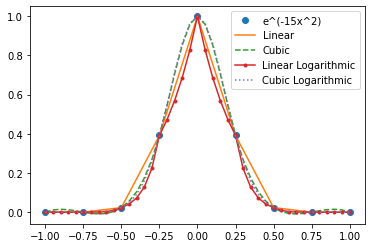

In [ ]:
plt.plot(x, g(x), 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, np.exp(f3(xnew)), '.-', xnew, np.exp(f4(xnew)), ':')
plt.legend(['e^(-15x^2)', 'Linear', 'Cubic', 'Linear Logarithmic', 'Cubic Logarithmic'], loc='best')
plt.show()

RMSE formula is the following: $$\sqrt{\dfrac{\sum (x_{true} - x_{predicted})^2}{N}} $$

In [ ]:
def rmse(true, observed):
  return np.sqrt(np.square(np.subtract(true, observed)).mean())

In [ ]:
print('The error of linear spline is', rmse(g(xnew), f(xnew)))

The error of linear spline is 0.047560590366032204


In [ ]:
print('The error of cubic spline is', rmse(g(xnew), f2(xnew)))

The error of cubic spline is 0.008758120934795818


In [ ]:
print('The error of linear spline with logarithm is', rmse(g(xnew), np.exp(f3(xnew))))

The error of linear spline with logarithm is 0.06219588273739093


In [ ]:
print('The error of cubic spline with logarithm is', rmse(g(xnew), np.exp(f4(xnew))))

The error of cubic spline with logarithm is 3.092615216996919e-17


# **CONCLUSION**

Cubic splines with logarithmization showed the least error among all four, it could also be seen from the graph. This could happen due to interpolation of a low-degree polynomial using a higher degree polynomial. Linear splines did not show a good error because the function is not linear, which is why the errors for linear splines were big. To sum up, it can well be said that interpolation is a good method to determine precise values of a unknown function.